# 부분회귀
https://datascienceschool.net/03%20machine%20learning/04.05%20부분회귀.html?highlight=부분회귀

- 만약 회귀분석을 한 후에 새로운 독립변수를 추가하여 다시 회귀분석을 한다면 그 전에 회귀분석으로 구했던 가중치의 값은 변할까 변하지 않을까? 예를 들어 𝑥1이라는 독립변수만으로 회귀분석한 결과가 다음과 같다고 하자.


$$y = w_1 x_1 + e$$

이 때 새로운 독립변수 𝑥2를 추가하여 회귀분석을 하게 되면 이 때 나오는 𝑥1에 대한 가중치 𝑤′1가 원래의 𝑤1과 같을까 다를까?


$$y = w_1' x_1 + w_2' x_2 + e'$$

> 답부터 말하자면 일반적으로 𝑤′1의 값은 원래의 𝑤1의 값과 다르다.

# 부분회귀 플롯

독립변수의 갯수가 많을 때 **특정한 하나의 독립변수의 영향력을 시각화하는 방법이 부분회귀 플롯(Partial Regression Plot)**이다. Added Variable Plot이라고도 한다. 부분회귀 플롯을 그리기 위해서는 3번의 선형 회귀분석을 해야 한다.

1. 특정한 독립변수 $x_2$를 제외한 나머지 독립변수 $X_1$들로 종속변수 𝑦를 선형 회귀분석하여 잔차 $y_*$를 구한다.
2. 특정한 독립변수 $x_2$를 제외한 나머지 독립변수 $X_1$들로 특정한 독립변수 $x_2$를 선형 회귀분석하여 잔차 $x_2^*$를 구한다.
3. 잔차 $x_2^*$를 독립변수로, 잔차 $y_*$를 종속변수로 하여 선형 회귀분석한다.

이렇게 구한 $x_2$, $y^*$의 스캐터 플롯과 회귀분석 결과를 나타낸 것이 부분회귀 플롯이다. 보스턴 데이터를 예로 들어보자.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

#### 단순하게 AGE라는 독립변수와 MEDV 종속변수간의 관계를 살펴보면 마치 음의 상관관계가 있는 것처럼 보인다.

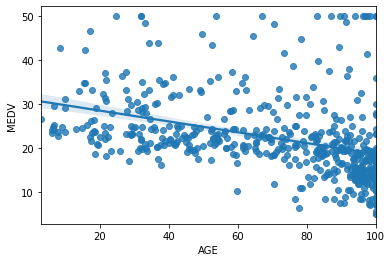

In [4]:
sns.regplot(x="AGE", y="MEDV", data=df)
plt.show()

## statsmodels 패키지의 sm.graphics.plot_partregress 명령
을 쓰면 부분회귀 플롯을 그릴 수 있다. 이 때 다른 변수의 이름을 모두 지정해 주어야 한다.

```python
plot_partregress(endog, exog_i, exog_others, data=None, obs_labels=True, ret_coords=False)
```

- endog: 종속변수 문자열
- exog_i: 분석 대상이 되는 독립변수 문자열
- exog_others: 나머지 독립변수 문자열의 리스트
- data: 모든 데이터가 있는 데이터프레임
- obs_labels: 데이터 라벨링 여부
- ret_coords: 잔차 데이터 반환 여부

#### 부분회귀 플롯으로 살펴보면 AGE 변수와 종속변수는 상관관계가 없다는 것을 알 수 있다.

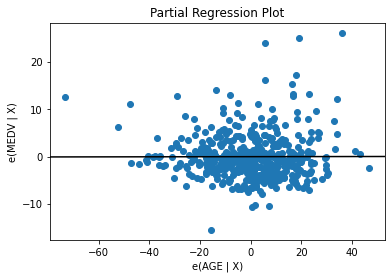

In [5]:
others = list(set(df.columns).difference(set(["MEDV", "AGE"])))
p, resids = sm.graphics.plot_partregress(
    "MEDV", "AGE", others, data=df, obs_labels=False, ret_coords=True
)
plt.show()

부분회귀 플롯에서 가로축의 값은 독립변수 자체의 값이 아니라 어떤 독립변수에서 다른 독립변수의 영향을 제거한 일종의 **“순수한 독립변수 성분”**을 뜻한다. `sm.graphics.plot_partregress_grid` 명령을 쓰면 전체 데이터에 대해 한번에 부분회귀 플롯을 그릴 수 있다.

```python
plot_partregress_grid(result, fig)
```
- result: 회귀분석 결과 객체
- fig: plt.figure 객체


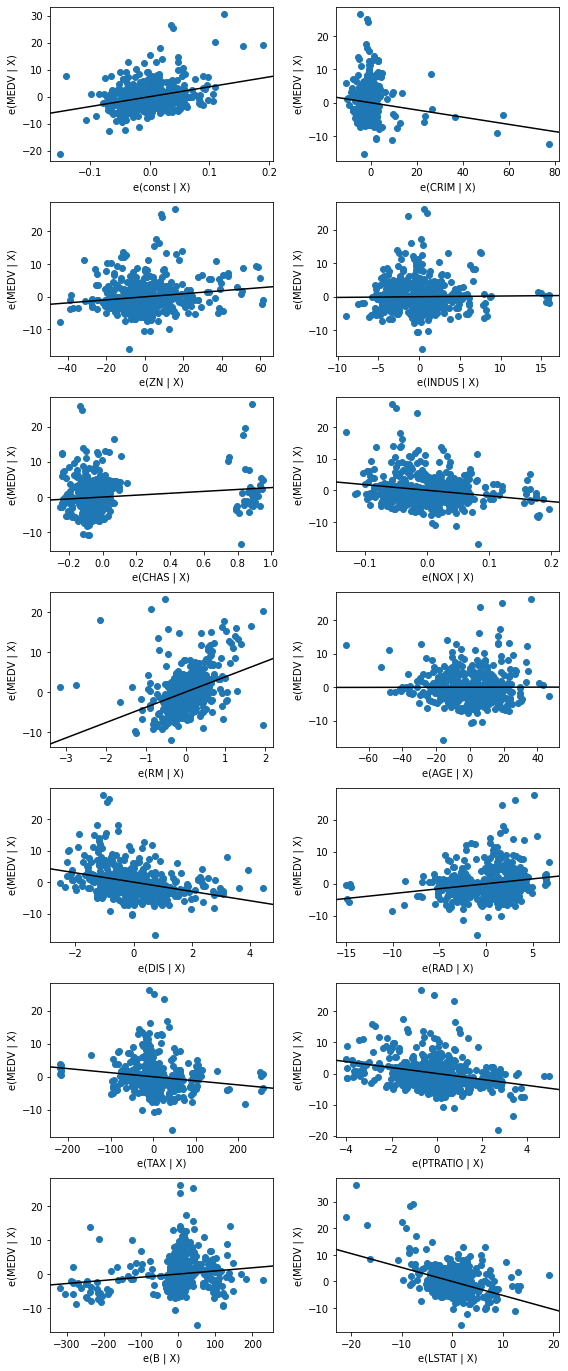

In [6]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

# CCPR 플롯
CCPR(Component-Component plus Residual) 플롯도 부분회귀 플롯과 마찬가지로 특정한 하나의 변수의 영향을 살펴보기 위한 것이다. 다음과 같은 회귀 모형이 있다고 가정하자.

$$y = \hat{y} + e = w_1 x_1 +  w_2 x_2 +  \cdots + w_i x_i +  \cdots +  w_K x_K + e$$

CCPR 플롯은 이 성분 중에서

- $x_i$를 가로축으로
- $w_i x_i + e$을 세로축으로

그린 스캐터 플롯이다. statsmodels 패키지의 `sm.graphics.plot_ccpr` 명령으로 CCPR 플롯을 그릴 수 있다.

```python
plot_ccpr(result, exog_idx)
```

- result: 회귀분석 결과 객체
- exog_idx: 분석 대상이 되는 독립변수 문자열


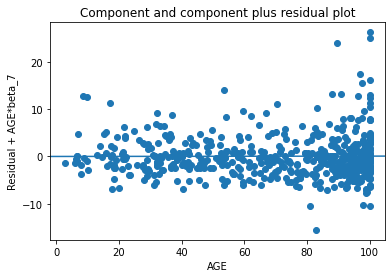

In [7]:
# CCPR 플롯에서는 부분회귀 플롯과 달리 독립변수가 원래의 값 그대로 나타난다.
sm.graphics.plot_ccpr(result_boston, "AGE")
plt.show()

#### sm.graphics.plot_ccpr_grid
명령을 쓰면 전체 데이터에 대해 한번에 CCPR 플롯을 그릴 수 있다. `plot_ccpr_grid` 명령은 모든 독립변수에 대해 CCPR 플롯을 그려준다.

```python
plot_ccpr_grid(result, fig)
```

- result: 회귀분석 결과 객체
- fig: plt.figure 객체

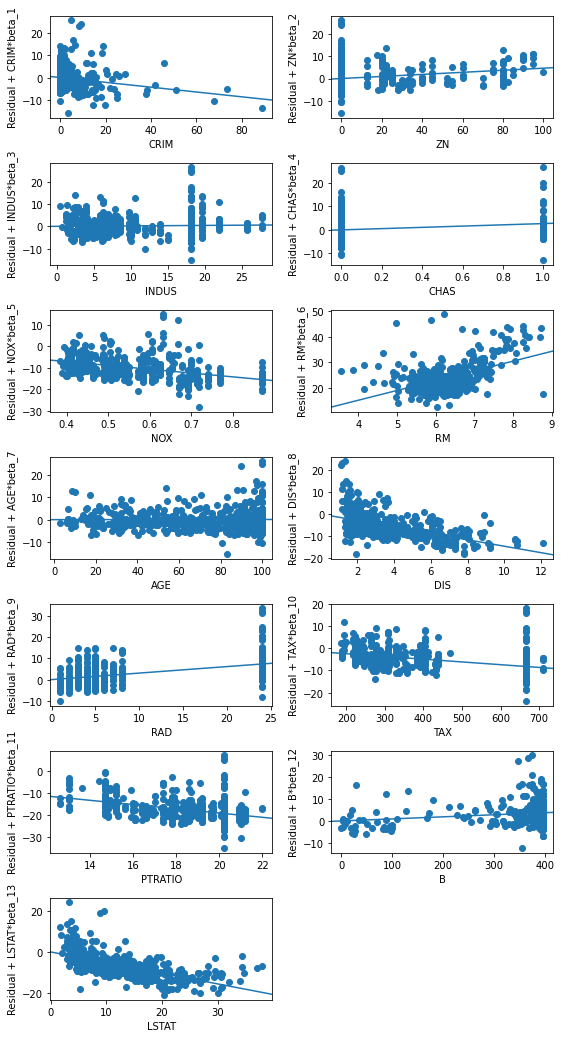

In [8]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

#### plot_regress_exog 명령은 부분회귀 플롯과 CCPR을 같이 보여준다.

```python
lot_regress_exog(result, exog_idx)
```
- result: 회귀분석 결과 객체
- exog_idx: 분석 대상이 되는 독립변수 문자열


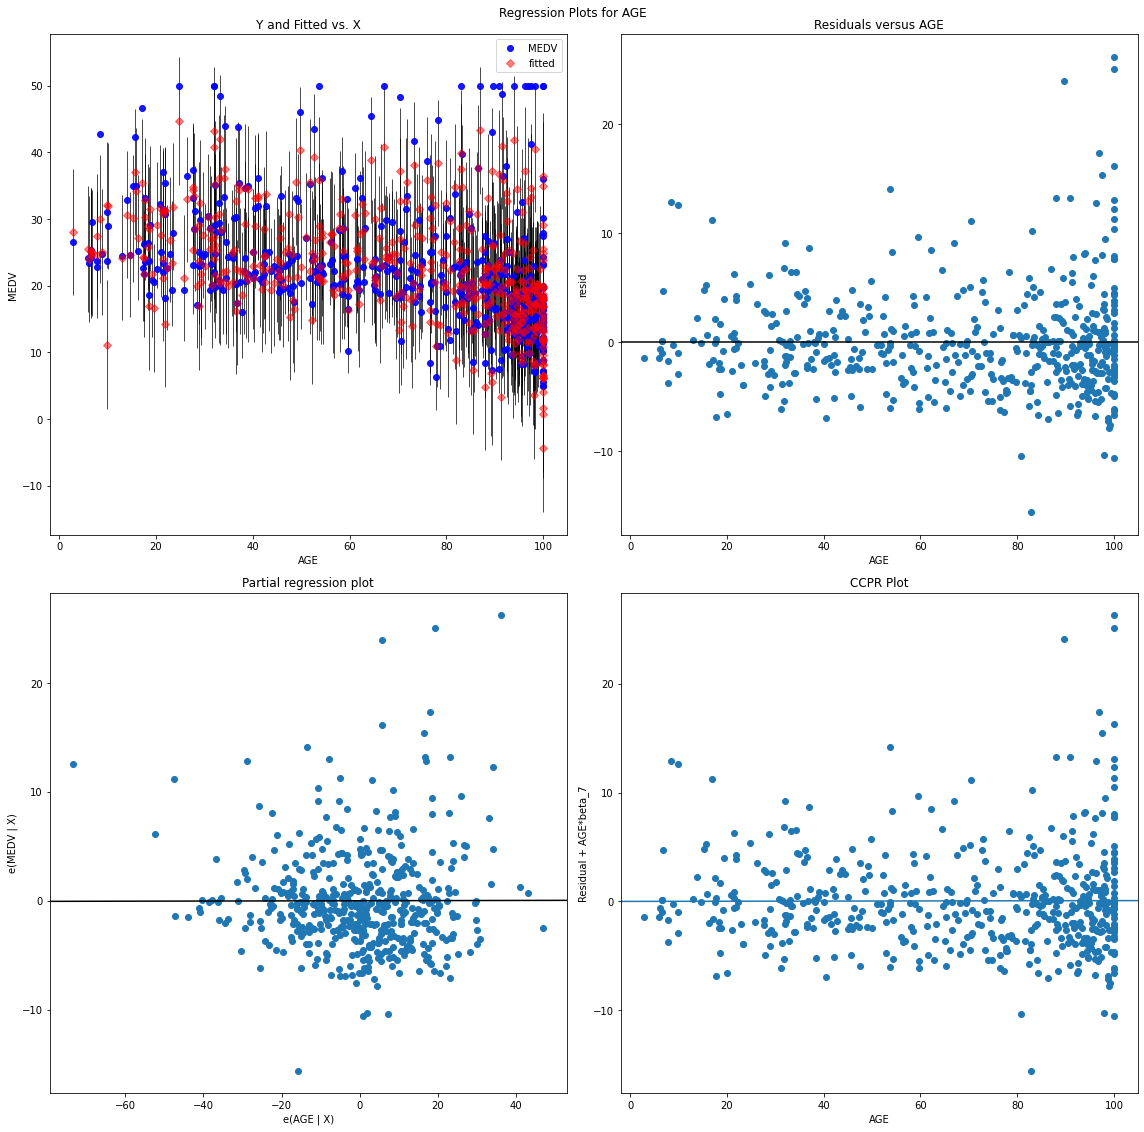

In [13]:
fig = sm.graphics.plot_regress_exog(result_boston, "AGE", plt.figure(figsize=(16,16)))
plt.tight_layout()
plt.show()